## TASK1 :- STUDENT"S  PERCENTAGE PREDICTION USING LINEAR REGRESSION

## AUTHOR  :-  RUPESH KEESARAM


### Linear Regression  
 * Linear regression is a simple ML algorithm used for predicting continuous values. There are two ways of linear regression techniques
    1. Simple Linear Regression : Only one feature is used to train a model.
    2. Multiple Linear Regression: More than one feature is used to train a model.

### Important libraries being used
  1. Pandas          - Data preprocessing 
  2. Numpy           - Mathematical and Statistical calculations
  3. Matplotlib      - Visualization
  4. sklearn    - Spliiting data & creating model & Training a model & Prediction
  
  
# GETTING STARTED WITH CODE

## 1. EXPORATORY DATA ANALYSIS (EDA)
     EDA is used for better understanding of dataset and the relation among different features.

In [2]:
# importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
# link to download data 

data_url ="http://bit.ly/w-data"

# reading data using pd.read_csv() method

data = pd.read_csv(data_url)

# sample view of data

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# no of records/ rows in the dataset

data.index

RangeIndex(start=0, stop=25, step=1)

In [6]:
# Finding column names

data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# Shape of dataframe ( rows, columns)

data.shape

(25, 2)

In [8]:
# mean of Study Hours

data["Hours"].mean()

5.012

In [9]:
# finding the max and min scores

print("Max score is :",data["Scores"].max())
print("Min score is :",data["Scores"].min())

Max score is : 95
Min score is : 17


In [10]:
# Describing more about dataset

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 2. Exploring the data visually / Data Visualization

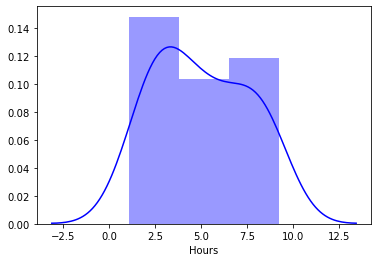

In [11]:
# finding shape and spread of HOURS data 

sns.distplot(data["Hours"],color="blue")

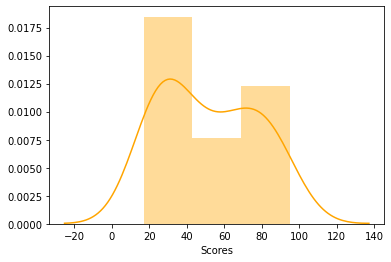

In [12]:
# finding shape and spread of SCORES data 

sns.distplot(data["Scores"],color="orange")

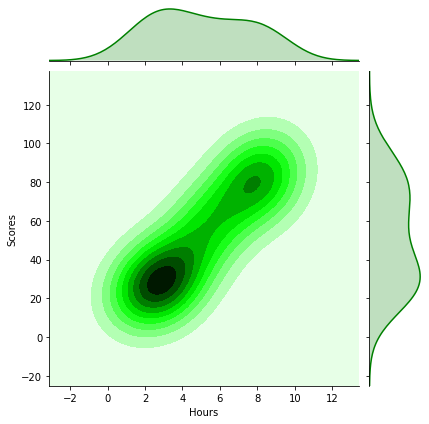

In [13]:
# Plotting Bivariate relation between HOURS and SCORES

sns.jointplot(x=data["Hours"],y=data["Scores"],kind="kde",color="green")

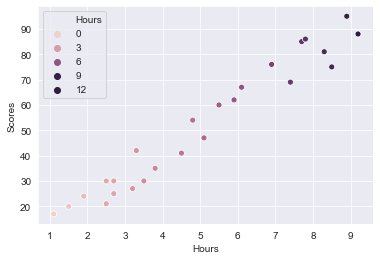

In [14]:
# plotting scatter plot

sns.set_style("darkgrid")
sns.scatterplot(x=data["Hours"],y= data["Scores"],hue = data["Hours"])

* After visualization, it's now clear that Hours and Scores are directly propotional  ( If Hours increases then the score/ percentage also get increases )
* The color of scatter points are fading in if the no of study hours are increasing

## 3. Preparing the data
* Preparing the data includes separation of input (features) and output (result) columns

In [15]:
# feature column data
train_values = data.iloc[:,:-1].values

# result column data
test_values = data.iloc[:,1].values

# Top 5 sample values in train_values
print(train_values[:5])

print()

# Top 5 values in test_values
print(test_values[:5])

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]

[21 47 27 75 30]


## 4. Splitting Training and Testing Data

In [16]:
# importing required methods

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(train_values,test_values)

In [17]:
# shapes of train and test data sets

print("Shape of x_train :",x_train.shape[0])
print("Shape of y_train :",y_train.shape[0])
print("Shape of x_test :",x_test.shape[0])
print("Shape of y_test :",y_test.shape[0])

Shape of x_train : 18
Shape of y_train : 18
Shape of x_test : 7
Shape of y_test : 7


## 5. Model Creation & Model Training

In [18]:
# importing the model
from sklearn.linear_model import LinearRegression

# creating model object 
Model = LinearRegression()

# training the model
Model.fit(x_train,y_train)

print("Training completed")

Training completed


### Regression line for training data

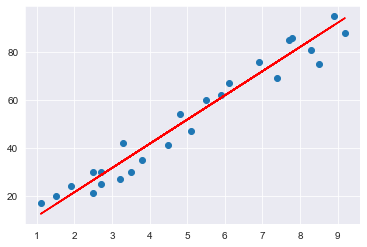

In [19]:
# Model predicted values for x_train (used to draw prediction line)
line_values = Model.coef_*train_values+Model.intercept_

# plotting Regression line for train data
plt.scatter(train_values,test_values)
plt.plot(train_values,line_values,color="red")
plt.show()

### Predicting values for x_test

In [20]:
# prediction for test data
y_test_pred = Model.predict(x_test)

print("Predicted values : ",y_test_pred)

Predicted values :  [49.77231772 56.84875857 76.05624087 33.59759578 62.91427929 87.17636221
 26.52115493]


In [21]:
# Sample dataframe showing predicted values and actual values

samp_df = pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
samp_df

,Actual,Predicted
0,54,49.772318
1,60,56.848759
2,69,76.056241
3,27,33.597596
4,67,62.914279
5,75,87.176362
6,30,26.521155


### Regression line for test data

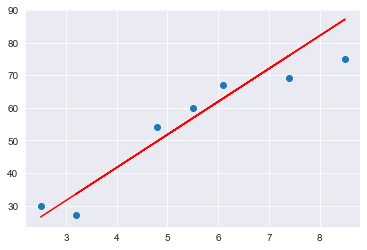

In [22]:
# plotting x_test and y_test values
plt.scatter(x_test,y_test)

# plotting regression line
plt.plot(x_test,y_test_pred,color ="red")

# showing plot
plt.show()

## Problem Statement : Score of a student if he studies for 9.5 hrs per day

In [23]:
hours = [[9.5]]

# making prediction
pred_score = Model.predict(hours)

print("Hours Studied : {} \nScore Predicted : {}".format(hours[0][0],pred_score[0]))

Hours Studied : 9.5 
Score Predicted : 97.28556341984049


### A student will get  94.23 % if he can able study 9.5 hrs a day

# Model Evaluation
* There are sevaral metrics available to evaluate a model. Here in this case we will be considering RMSE(Root Mean Squared Error) and Mean Absolute Error to evaluate our model

In [24]:
from sklearn import metrics

In [25]:
# Finding mean absolute error
print(metrics.mean_absolute_error(y_test,y_test_pred))

5.824812621374809


In [26]:
# Finding mean squared error
print(metrics.mean_squared_error(y_test,y_test_pred))

42.59738551889677


In [27]:
# r2_score 
print(metrics.r2_score(y_test,y_test_pred))

0.8628238768121752
